In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [16]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=256
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 116s 572ms/step - accuracy: 0.3324 - loss: 2.0029 - val_accuracy: 0.1222 - val_loss: 2.9449
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 110s 563ms/step - accuracy: 0.4851 - loss: 1.4594 - val_accuracy: 0.3487 - val_loss: 1.9254
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 569ms/step - accuracy: 0.5399 - loss: 1.3092 - val_accuracy: 0.5141 - val_loss: 1.3890
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 111s 568ms/step - accuracy: 0.5675 - loss: 1.2266 - val_accuracy: 0.6062 - val_loss: 1.1142
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 152s 621ms/step - accuracy: 0.5959 - loss: 1.1425 - val_accuracy: 0.6002 - val_loss: 1.1971
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 573ms/step - accuracy: 0.6162 - loss: 1.0927 - val_accuracy: 0.6297 - val_loss: 1.0674
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 595ms/step - accuracy: 0.6278 - loss: 1.0550 - val_accuracy: 0.5771 - val_loss: 1.3033
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 113s 575ms/step - accuracy: 0.6396 -

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 5s - 15ms/step - accuracy: 0.6661 - loss: 0.9618

✅ Test Accuracy: 66.61%


In [21]:
num_samples = 10
indices = np.random.choice(len(x_test), num_samples)
x_sample = x_test[indices]
y_true = y_test[indices]

In [22]:
y_pred = np.argmax(model.predict(x_sample), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


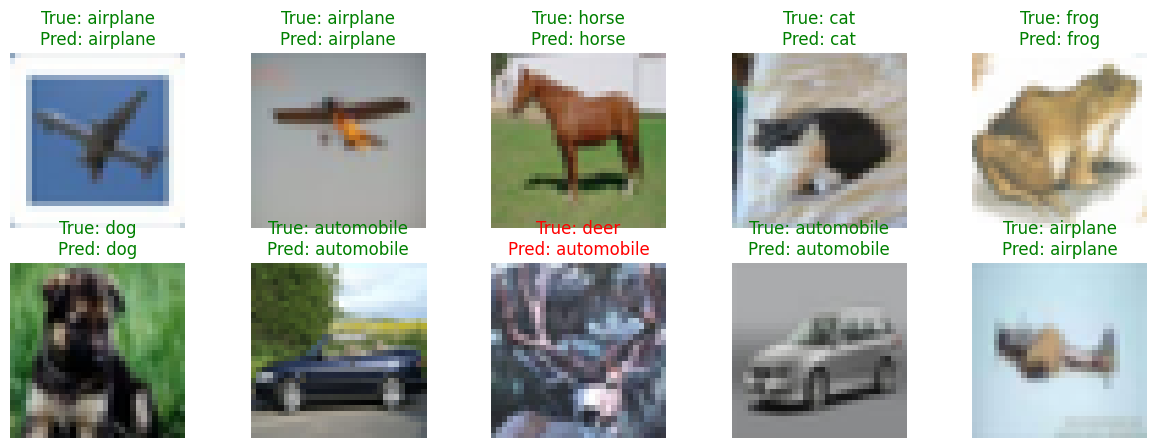

In [24]:
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_sample[i])
    color = "green" if y_true[i] == y_pred[i] else "red"
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred[i]]}", color=color)
    plt.axis('off')
plt.show()
